#Loan Sanction Analysis

##Problem Statement
Dream Housing Finance company deals in all home loans. They have a presence across all
urban, semi-urban and rural areas. The customer first applies for a home loan, after that
company validates the customer's eligibility for a loan. The company wants to automate the
loan eligibility process (real-time) based on customer detail provided while filling out the online
application form. These details are Gender, Marital Status, Education, Number of Dependents,
Income, Loan Amount, Credit History and others.

# Import Libraries/Dataset

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read dataset
file_id = '1WDtHB5FALrnPBYgSKK1AfufQnhzspKtk'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
data = pd.read_csv(url)

#Data Visualization and Exploration

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Drop Loan_ID as it does not have any importance in the dataset

In [ ]:
# Dropping the feature Loan_ID
data.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
# check data types, null values, length of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


From the above cell we observe that there are 12 features out of which, 5 are numeric features, 7 are categorical features and 7 features have null values. The length of the dataset is 614

In [ ]:
# check statistical summary of numeric features
data.describe(include='number')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From the statistical summary we observe high deviation in the features, ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term

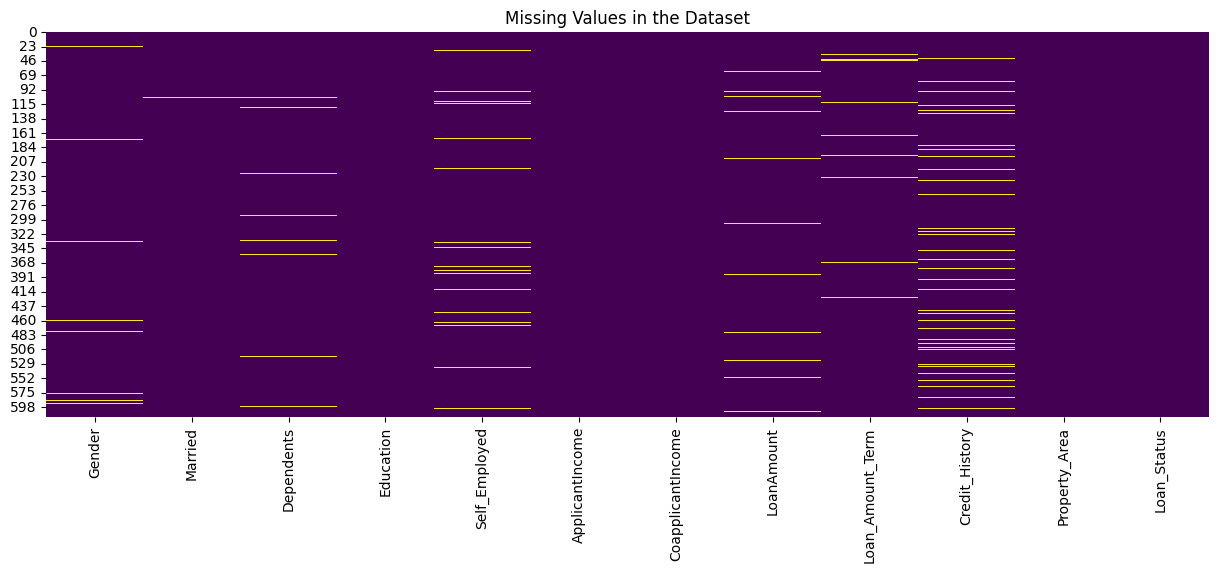

In [ ]:
# Visualize missing values
plt.figure(figsize=(15, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

From the plot above we observe that Credit_History has the highest number of missing values

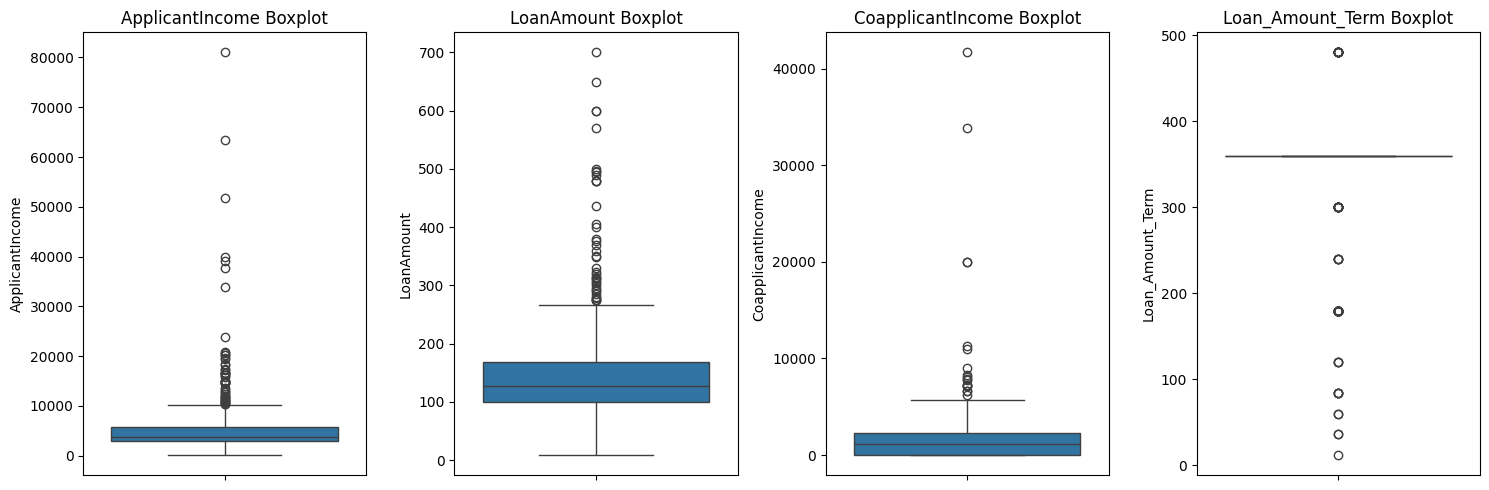

In [ ]:
# Visualize outliers in numerical columns
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y=data['ApplicantIncome'])
plt.title('ApplicantIncome Boxplot')

plt.subplot(1, 4, 2)
sns.boxplot(y=data['LoanAmount'])
plt.title('LoanAmount Boxplot')

plt.subplot(1, 4, 3)
sns.boxplot(y=data['CoapplicantIncome'])
plt.title('CoapplicantIncome Boxplot')

plt.subplot(1, 4, 4)
sns.boxplot(y=data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term Boxplot')

plt.tight_layout()
plt.show()

From the Boxplots for various numeric features, we observe that LoanAmount has the most outliers and Loan_Amount_Term the least number of outliers.

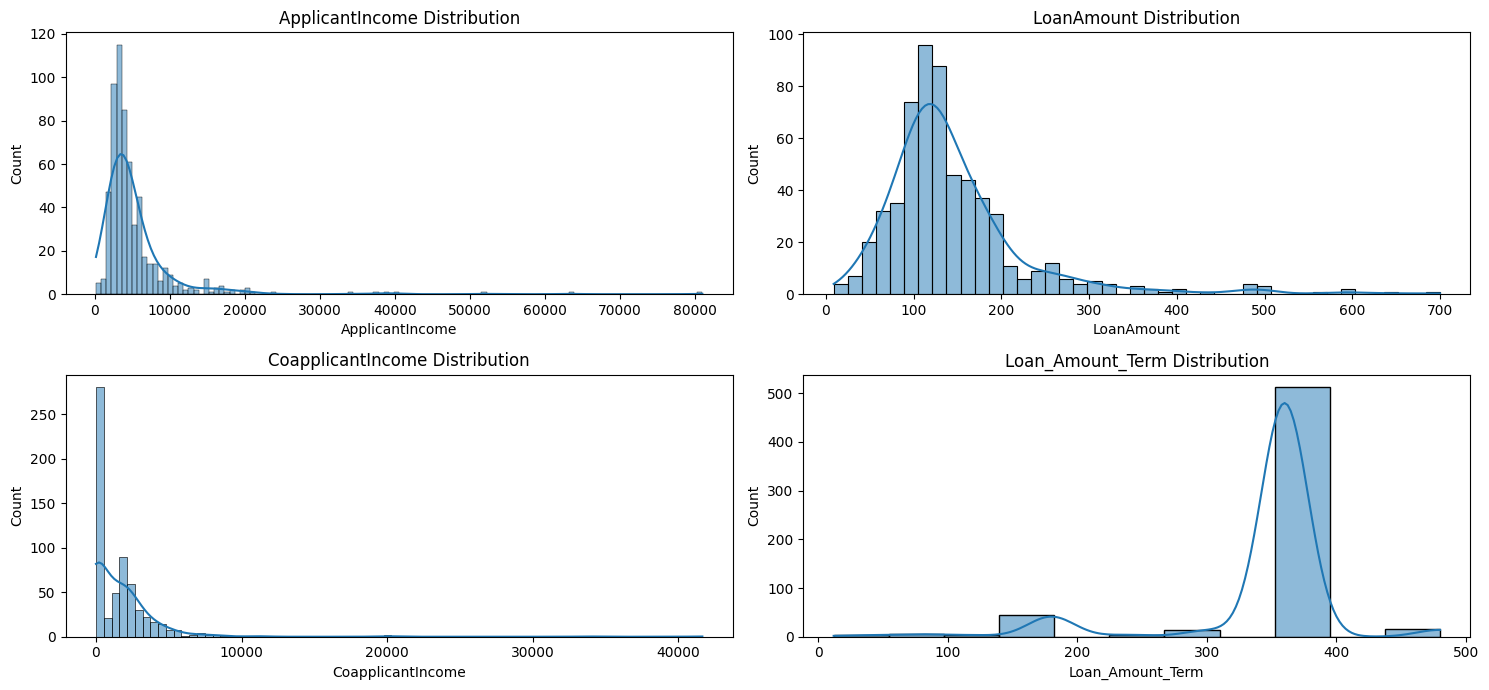

In [ ]:
# Visualize skewness in numerical columns
plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['ApplicantIncome'], kde=True)
plt.title('ApplicantIncome Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['LoanAmount'], kde=True)
plt.title('LoanAmount Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['CoapplicantIncome'], kde=True)
plt.title('CoapplicantIncome Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['Loan_Amount_Term'], kde=True)
plt.title('Loan_Amount_Term Distribution')

plt.tight_layout()
plt.show()


* Applicant Income Distribution shows that the majority of applicants have an
income less than 20,000, we also observe that the plot is slightly skewed.
* Loan Amount Distribution shows that the majority of loans are between 100 and 300 with mild skewness.
* Coapplicant Income Distribution shows that the majority of co-applicants have an income less than 10,000 with high skewness.
* Loan Amount Term Distribution shows that the majority of loans have a term around 360.

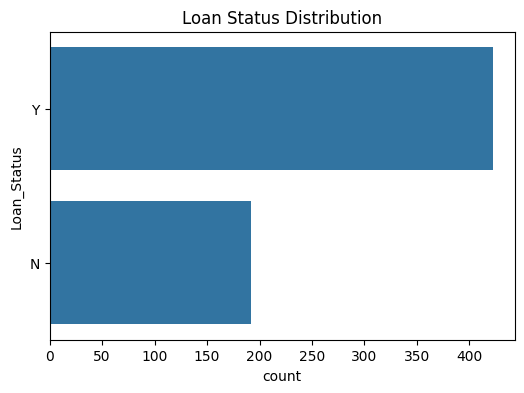

In [ ]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['Loan_Status'])
plt.title('Loan Status Distribution')
plt.show()

From the above plot we can observe that there is a high class imbalance with Loan_Status as Y more than twice the Loan_Status as N.
Traditional machine learning models trained on this imbalanced data might be biased towards the majority class (approved loans) and perform poorly on the minority class (rejected loans). This can lead to:
* High false negative rate for rejected loans: The model might incorrectly classify a bad loan application (one that should be rejected) as approved.
* Lower overall accuracy for the model.

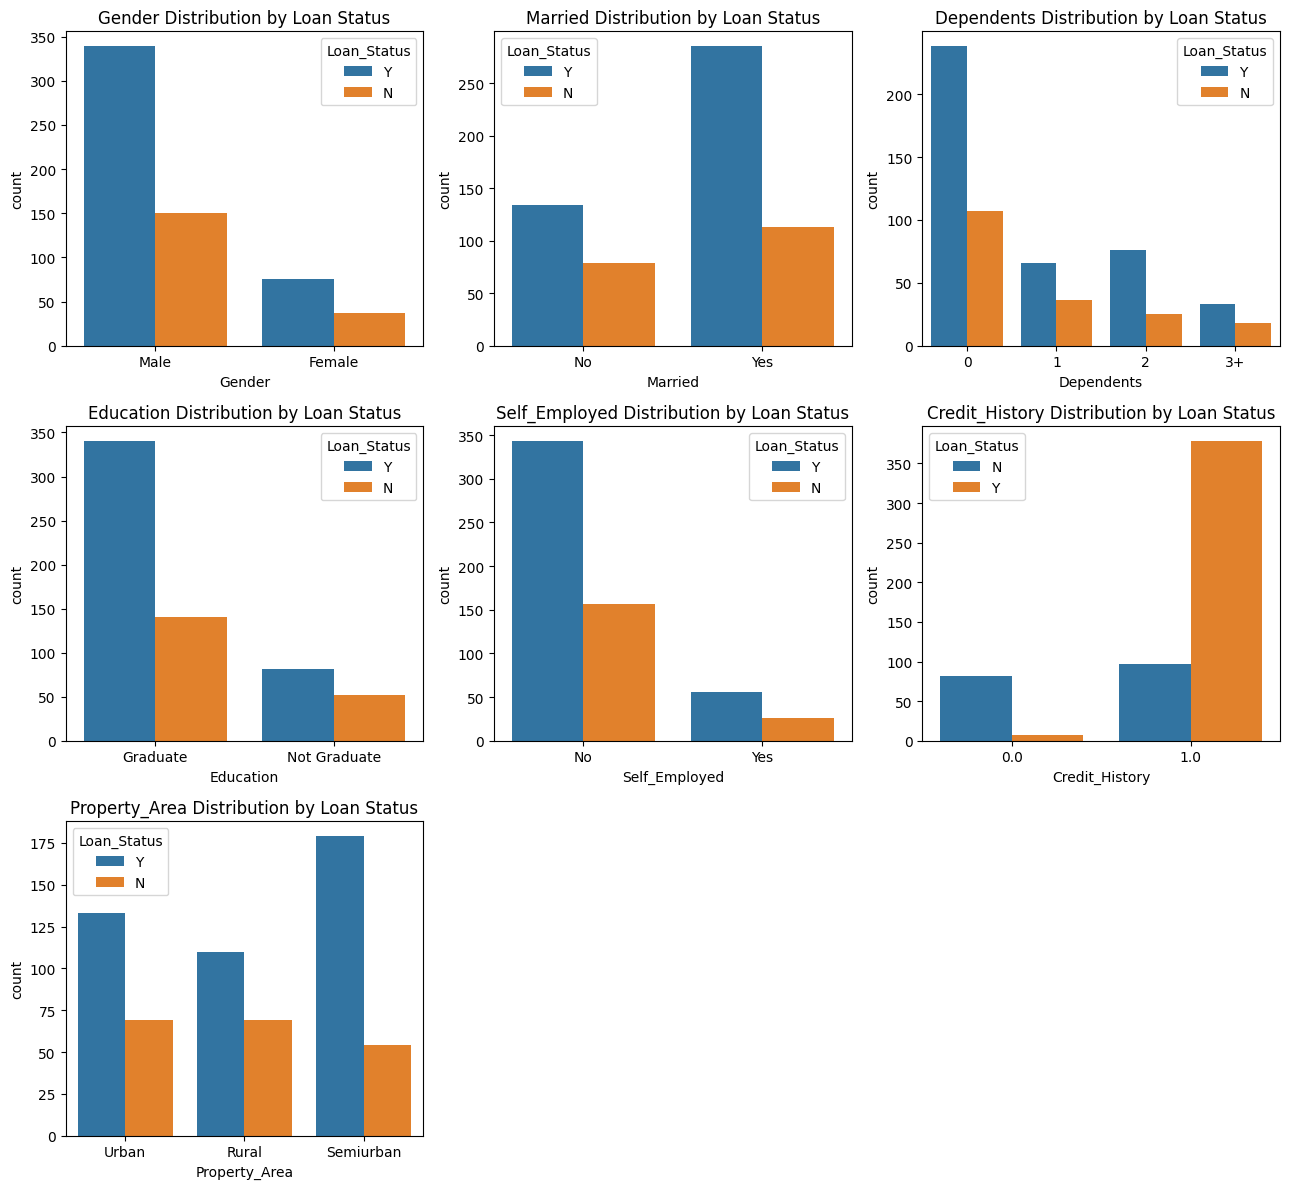

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(13, 12))
for i, col in enumerate(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=data, hue='Loan_Status')
    plt.title(f'{col} Distribution by Loan Status')
    plt.tight_layout()
plt.show()


* **Gender Distribution by Loan Status**: There seems to be a hiher number of male loan applicants. Also, the proportion of males with Y loan status is slightly higher than females.
* **Marital Status Distribution by Loan Status**: A higher number of applicants with loan status 'N' are married compared to those with loan status 'Y'. This could suggest that marital status might be a factor in loan approval.
* **Dependents Distribution by Loan Status**: The number of applicants with lesser number of dependents has significatly higher numbers of loan status besing 'Y'. This could be another factor influencing loan approval.
* **Education Level Distribution by Loan Status**: Graduates has a higher number of loan status as 'Y' compared to Not Graduates
* **Self Employed Distribution by Loan Status**: The number of non self-employed applicants with loan status 'Y' is higher than self-employed applicants.
* **Credit History Distribution by Loan Status**: The majority of applicants with loan status 'Y' have a clean credit history. However, there is a significantly low number of applicants with loan status 'Y' who have a non clean credit history.
* **Property Area Distribution by Loan Status**: A higher number of applicants living in Semiurban areas have loan status 'Y' compared to those in Urban and Rural areas. This could suggest that property area might be a factor in loan approval.

In [ ]:
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In the above cell we encode all the categorical features with LabelEncoder, for further analysis and preprocessing. We verify the same in the cell below.

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


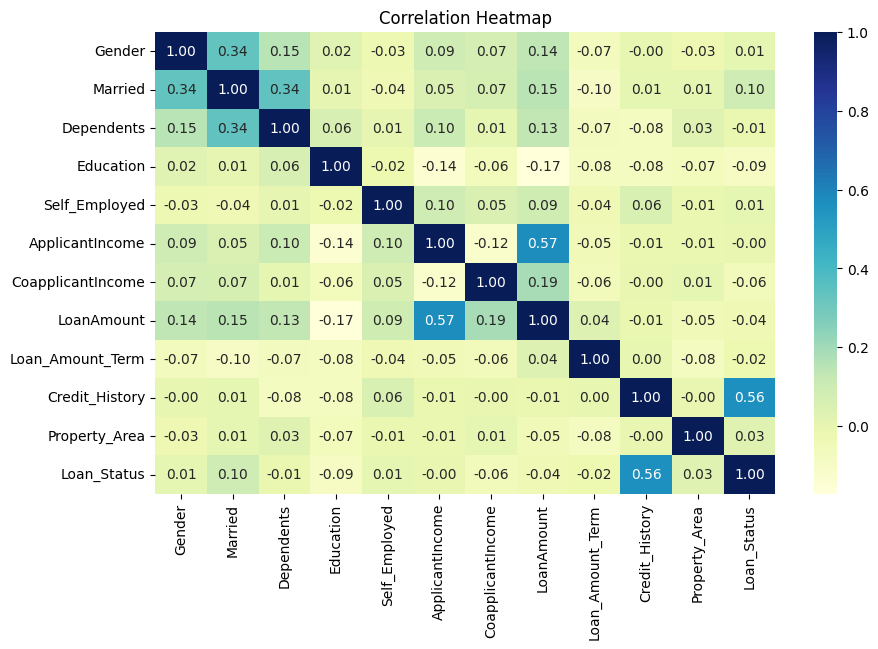

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the correlation plot we observe that:
* Credit history has the highest correlation with loan status
* Applicant and Coapplicant income has the highest correlation with the loan amount
* There also seems to be a mild but significant correlation between gender, married and dependents

We also use Point-Biserial Correlation for further analysis of impacts of each feature

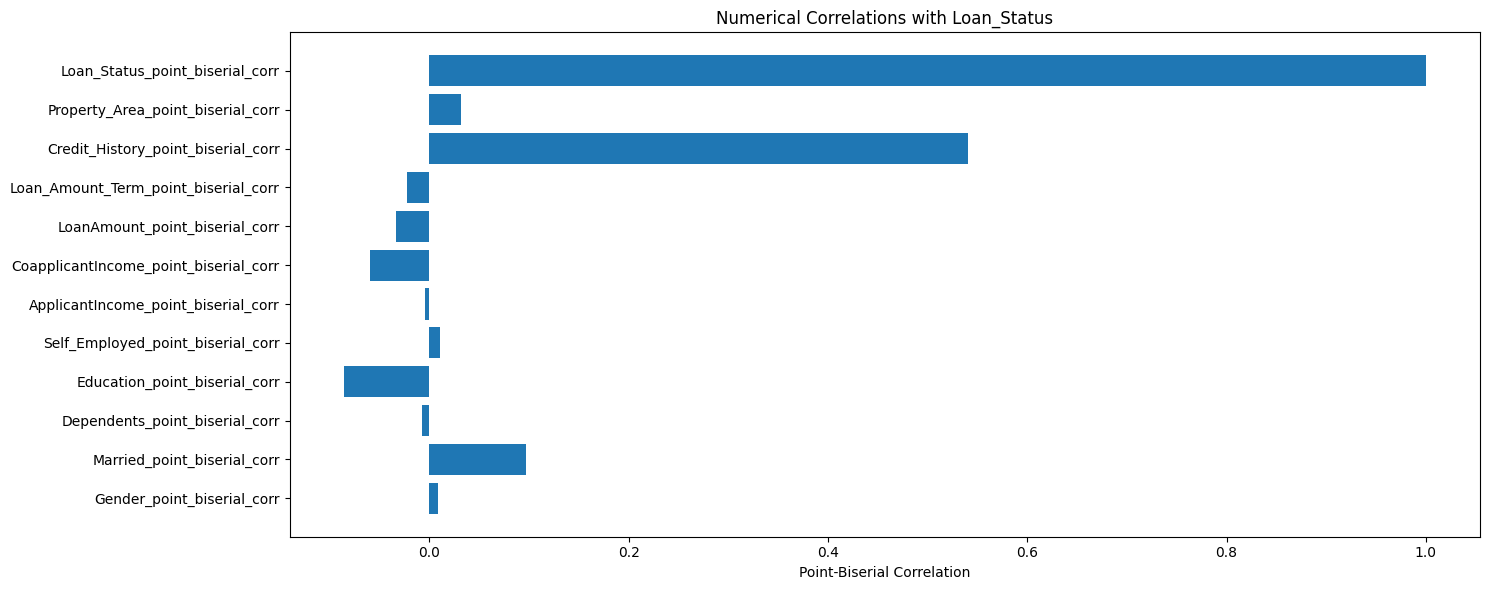

In [ ]:
correlations = {}

# Handle missing values in numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Calculate Point-Biserial Correlation for numerical columns with the target
for column in numerical_columns:
    point_biserial_corr, _ = pointbiserialr(data[column], data['Loan_Status'])
    correlations[f"{column}_point_biserial_corr"] = point_biserial_corr

# Extract correlations
categorical_correlations = {k: v for k, v in correlations.items() if 'cramers_v' in k}
numerical_correlations = {k: v for k, v in correlations.items() if 'point_biserial_corr' in k}

plt.figure(figsize=(15, 6))

# Plot numerical correlations (Point-Biserial Correlation)
plt.plot()
plt.barh(list(numerical_correlations.keys()), list(numerical_correlations.values()))
plt.xlabel('Point-Biserial Correlation')
plt.title('Numerical Correlations with Loan_Status')

plt.tight_layout()
plt.show()

From Point-Biserial Correlation of the data we observe that:
* Credit History, Married and Property Area has highest positive correlation
* Education, CoapplicantIncome, LoanAmount and Loan Term has most significant negative correlation

Hence, based on the observations from both correlation analysis, we would perform feature engineering as follows:
1.   Create a new feature Total Income as a sum of Applicant Income and Coapplicant Income. Since the total income of the household will decide the chances of delayed payment.
2.   Create a new feature EMI as a ratio of loan amount with respect to loan amount term, Since people who have high EMI's might find it difficult to pay back the loan.
3.   Create a new feature Balance Income as the income left after the EMI has been paid. Since if this value is high, the chances are high that a person will repay the loan.



#3. Data Pre-processing and cleaning

In [ ]:
#check the frequency of Loan_Amount_Term values for imputation
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## Data Cleaning
* From the visualization earlier and the frequency of loan amount term shown above we observe that 526 data points out of 614 has 360 as their loan amount term, hence we replace them with the most frequent value.
* For the remaining features we use the median of the feature to replace missing values
* We handle the skewness using Log Transformation. Logarithmic transformation compresses the larger values and stretches the smaller ones, making the distribution more symmetrical

In [ ]:
# Impute Loan_Amount_Term missing values with most frequent value i.e 360
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Imputing missing values for numerical features with median
cols = data.loc[:, data.columns != 'Loan_Amount_Term']
for col in cols:
  data[col].fillna(data[col].median(), inplace=True)

# Handling Skewed Data
data['ApplicantIncome_Imputed'] = data['ApplicantIncome'].apply(lambda x: np.log(x+1))
data['CoapplicantIncome_Imputed'] = data['CoapplicantIncome'].apply(lambda x: np.log(x+1))
data['LoanAmount_Imputed'] = data['LoanAmount'].apply(lambda x: np.log(x+1))

## Feature Engineering
As discussed earlier in correlational analysis we add new features and drop the redundant features

In [ ]:
# create a new feature TotalIncome as a sum of ApplicantIncome_Imputed and CoapplicantIncome_Imputed
# Since the total income of the household will decide the chances of delayed payment
data['TotalIncome'] = data['ApplicantIncome_Imputed'] + data['CoapplicantIncome_Imputed']

# create a new feature EMI as a ratio of loan amount with respect to loan amount term,
# Since people who have high EMI’s might find it difficult to pay back the loan.
data['EMI'] = data['LoanAmount_Imputed']/data['Loan_Amount_Term']

# create a new feature Balance Income as the income left after the EMI has been paid.
# Since if this value is high, the chances are high that a person will repay the loan.
data['BalanceIncome'] = data['TotalIncome']-(data['EMI']*1000)

# Dropping the original columns to avoid redundancy
data.drop(['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome_Imputed', 'CoapplicantIncome_Imputed', 'Self_Employed', 'Loan_Amount_Term'], axis=1, inplace=True)

## Feature Transformation


### Normalization
All the features that are not encoded has high varience as observed from the visualization and statistical summary, hence, we use Min Max Scaler that normalizes features to a range between 0 and 1. This creates a consistent scale for all numerical features.

In [ ]:
# Normalization using Min Max Scaler, for all the non-encoded columns
scaler = MinMaxScaler()
num_cols = ['LoanAmount_Imputed', 'TotalIncome', 'BalanceIncome', 'EMI']
data[num_cols] = scaler.fit_transform(data[num_cols])

####Defining Goal and features

In [ ]:
# Preparing the data for model building
X = data.drop(['Loan_Status'], axis=1)  # Features
y = data['Loan_Status'] # Goal

#Assignment Part- 1

##4. Model Building And Performance Evaluation

In [ ]:
# Splitting the dataset into training and testing sets ratio 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the train and test sets to confirm successful split
print("X_train.shape, X_test.shape, y_train.shape, y_test.shape")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


X_train.shape, X_test.shape, y_train.shape, y_test.shape
(491, 10) (123, 10) (491,) (123,)


Logistic Regression Without Hyperparameter Tuning
Model Accuracy =  0.7886178861788617
Missclassification Rate =  0.21138211382113825
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

****************************************************************************************************

Best: params {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression With Hyperparameter Tuning
Model Accuracy =  0.7886178861788617
Missclassification Rate =  0.21138211382113825
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.76      0.99      0.86        80

    accuracy                 

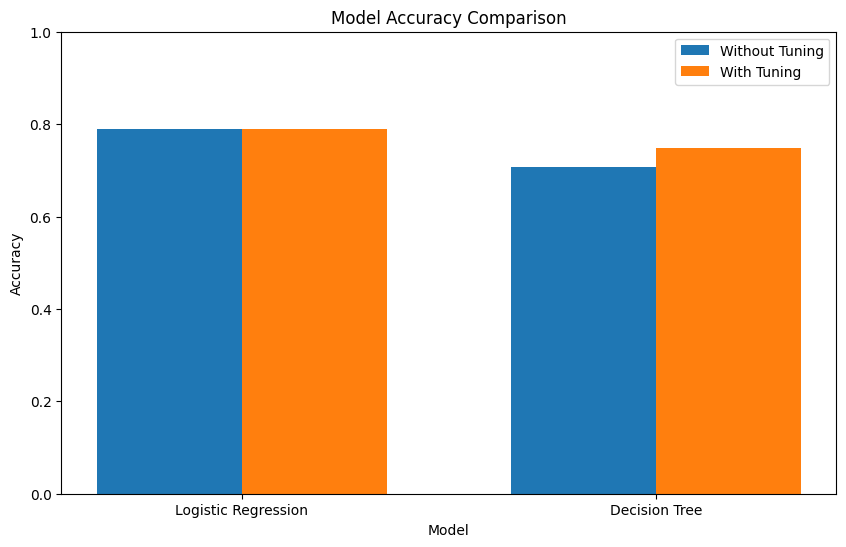

In [ ]:
# Logistic Regression without Hyperparameter Tuning
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
lr_accuracy_no_tuning = accuracy_score(y_test,pred)
missclassification_no_tuning  = 1 - lr_accuracy_no_tuning
print("Logistic Regression Without Hyperparameter Tuning")
print('Model Accuracy = ', lr_accuracy_no_tuning)
print('Missclassification Rate = ', missclassification_no_tuning)
print('Classification Report \n', classification_report(y_test,pred))
print("*"*100)
# Logistic Regression with Hyperparameter Tuning
model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in optimization problem
}

# Perform grid search with cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
pred_h = grid_result.predict(X_test)
lr_accuracy_tuned = accuracy_score(y_test, pred_h)
missclassification_tuned = 1 - lr_accuracy_tuned
print("\nBest: params" , grid_result.best_params_)
print("Logistic Regression With Hyperparameter Tuning")
print('Model Accuracy = ', lr_accuracy_tuned)
print('Missclassification Rate = ', missclassification_tuned)
print('Classification Report \n', classification_report(y_test, pred_h))
print("*"*100)


# Decision Tree without Hyperparameter Tuning
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
pred=model_tree.predict(X_test)
tree_accuracy_no_tuning = accuracy_score(y_test,pred)
missclassification_no_tuning = 1 - tree_accuracy_no_tuning
print("\nDecision Tree Without Hyperparameter Tuning")
print('Model Accuracy = ', tree_accuracy_no_tuning)
print('Missclassification Rate = ', missclassification_no_tuning)
print('Classification Report \n', classification_report(y_test,pred))
print("*"*100)

# Decision Tree with Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
tree_accuracy_tuned = accuracy_score(y_test, pred)
missclassification_tuned = 1 - tree_accuracy_tuned
print("\nDecision Tree With Hyperparameter Tuning")
print('Best Parameters:', best_params)
print('Model Accuracy = ', tree_accuracy_tuned)
print('Missclassification Rate = ', missclassification_tuned)
print('Classification Report \n', classification_report(y_test, pred))

# Create lists for plotting
models = ['Logistic Regression', 'Decision Tree']
accuracies_no_tuning = [lr_accuracy_no_tuning, tree_accuracy_no_tuning]
accuracies_tuned = [lr_accuracy_tuned, tree_accuracy_tuned]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, accuracies_no_tuning, bar_width, label='Without Tuning')
plt.bar([i + bar_width for i in index], accuracies_tuned, bar_width, label='With Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.ylim(0, 1)
plt.legend()
plt.show()

From the Performance Metrics of Logistic Regression and Decision Tree with 80-20 train test split, we observe that:
* Best parameters for logistic regression are {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
* Best parameters for decision tree are {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
* Hyperparameter tuning has no impact on the performance of Logistic regression model for this case study, with test accuracy of 78.86% with and without hyperparameter tuning
* Decision Tree seems to perform slightly better with hyperparameter tuning, with test accuracy of 74.79% without hyperparameter tuning and 70.73% with hyperparameter tuning
* Overall Logistic regression with hyperparameter tuning performs better than decision tree by 8% and with hyperparameter tuning by 4%

Due to class imbalance, with loan status 'Y' being the majority class, it is better to perform oversampling to treat the imbalance and achive better model performance and avoid mojority class favouring, hence, trying a oversampler with 70-30 train test split

In [ ]:
# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Splitting the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

# Displaying the shape of the train and test sets to confirm successful split
print("X_train.shape, X_test.shape, y_train.shape, y_test.shape")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
(590, 10) (254, 10) (590,) (254,)


Logistic Regression Without Hyperparameter Tuning
Model Accuracy =  0.6692913385826772
Missclassification Rate =  0.3307086614173228
Classification Report 
               precision    recall  f1-score   support

         0.0       0.89      0.43      0.58       136
         1.0       0.59      0.94      0.73       118

    accuracy                           0.67       254
   macro avg       0.74      0.69      0.65       254
weighted avg       0.75      0.67      0.65       254

****************************************************************************************************

Best: params {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression With Hyperparameter Tuning
Model Accuracy =  0.6614173228346457
Missclassification Rate =  0.3385826771653543
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.38      0.55       136
         1.0       0.58      0.98      0.73       118

    accuracy                    

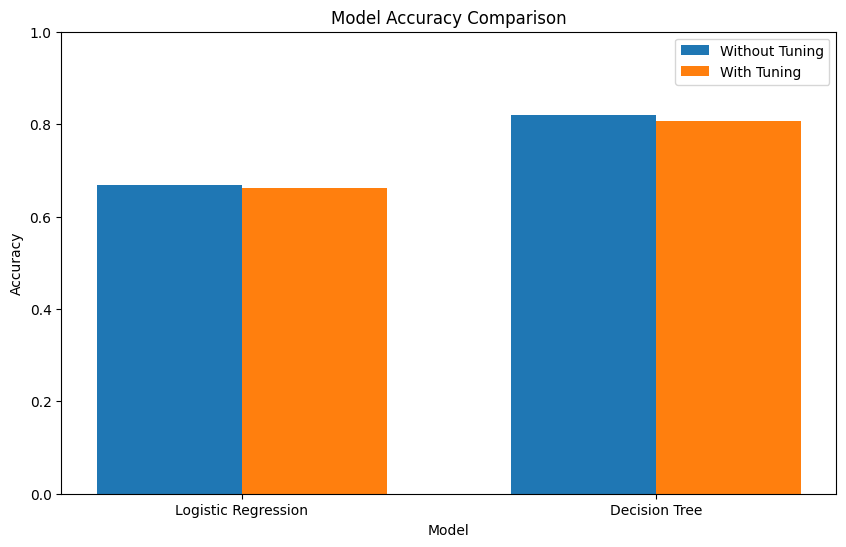

In [ ]:
# Logistic Regression without Hyperparameter Tuning
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
lr_accuracy_no_tuning = accuracy_score(y_test,pred)
missclassification_no_tuning  = 1 - lr_accuracy_no_tuning
print("Logistic Regression Without Hyperparameter Tuning")
print('Model Accuracy = ', lr_accuracy_no_tuning)
print('Missclassification Rate = ', missclassification_no_tuning)
print('Classification Report \n', classification_report(y_test,pred))
print("*"*100)
# Logistic Regression with Hyperparameter Tuning
model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in optimization problem
}

# Perform grid search with cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
pred_h = grid_result.predict(X_test)
lr_accuracy_tuned = accuracy_score(y_test, pred_h)
missclassification_tuned = 1 - lr_accuracy_tuned
print("\nBest: params" , grid_result.best_params_)
print("Logistic Regression With Hyperparameter Tuning")
print('Model Accuracy = ', lr_accuracy_tuned)
print('Missclassification Rate = ', missclassification_tuned)
print('Classification Report \n', classification_report(y_test, pred_h))
print("*"*100)


# Decision Tree without Hyperparameter Tuning
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
pred=model_tree.predict(X_test)
tree_accuracy_no_tuning = accuracy_score(y_test,pred)
missclassification_no_tuning = 1 - tree_accuracy_no_tuning
print("\nDecision Tree Without Hyperparameter Tuning")
print('Model Accuracy = ', tree_accuracy_no_tuning)
print('Missclassification Rate = ', missclassification_no_tuning)
print('Classification Report \n', classification_report(y_test,pred))
print("*"*100)

# Decision Tree with Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
tree_accuracy_tuned = accuracy_score(y_test, pred)
missclassification_tuned = 1 - tree_accuracy_tuned
print("\nDecision Tree With Hyperparameter Tuning")
print('Best Parameters:', best_params)
print('Model Accuracy = ', tree_accuracy_tuned)
print('Missclassification Rate = ', missclassification_tuned)
print('Classification Report \n', classification_report(y_test, pred))

# Create lists for plotting
models = ['Logistic Regression', 'Decision Tree']
accuracies_no_tuning = [lr_accuracy_no_tuning, tree_accuracy_no_tuning]
accuracies_tuned = [lr_accuracy_tuned, tree_accuracy_tuned]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, accuracies_no_tuning, bar_width, label='Without Tuning')
plt.bar([i + bar_width for i in index], accuracies_tuned, bar_width, label='With Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.ylim(0, 1)
plt.legend()
plt.show()

From the Performance Metrics of Logistic Regression and Decision Tree with oversampling and 70-30 train test split, we observe that:
* Best parameters for logistic regression are {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
* Best parameters for decision tree are {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
* Logistic Regression seems to perform slightly better without hyperparameter tuning, with test accuracy of 69.92% without hyperparameter tuning and 66.14% with hyperparameter tuning
* Decision Tree seems to perform slightly better with hyperparameter tuning, with test accuracy of 81.89% without hyperparameter tuning and 80.71% with hyperparameter tuning
* Overall Decision Tree without hyperparameter tuning performs better than logistic by 12% and with hyperparameter tuning by 14%.

##Conclusion
**Decision tree** with Random Over Sampling with a 70-30 train test split outperforms in this scenerio with a testing accuracy of **81.89%**.

This might be because Decision trees are well-suited for handling complex relationships between features and the target variable. If the data has non-linear relationships or interactions between features, a decision tree can capture these patterns more effectively than logistic regression, which is a linear model. For smaller datasets, decision trees can sometimes outperform logistic regression due to their flexibility. They can potentially overfit the data, capturing noise and specific patterns in the training data that might not generalize well to unseen data.

#Assignment Part- 2

##Model Building and Performance Evaluation

K-Nearest Neighbors:
With Hyperparameter Tuning
Best parameters: {'clf__n_neighbors': 5, 'clf__weights': 'uniform'}
Model Accuracy =  0.7642276422764228
Missclassification Rate =  0.2357723577235772
Classification Report = 
               precision    recall  f1-score   support

         0.0       0.79      0.44      0.57        43
         1.0       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123

****************************************************************************************************
K-Nearest Neighbors:
Without Hyperparameter Tuning
Model Accuracy =  0.7642276422764228
Missclassification Rate =  0.2357723577235772
Classification Report = 
               precision    recall  f1-score   support

         0.0       0.79      0.44      0.57        43
         1.0       0.76      0.94      0.84        80

    accuracy           

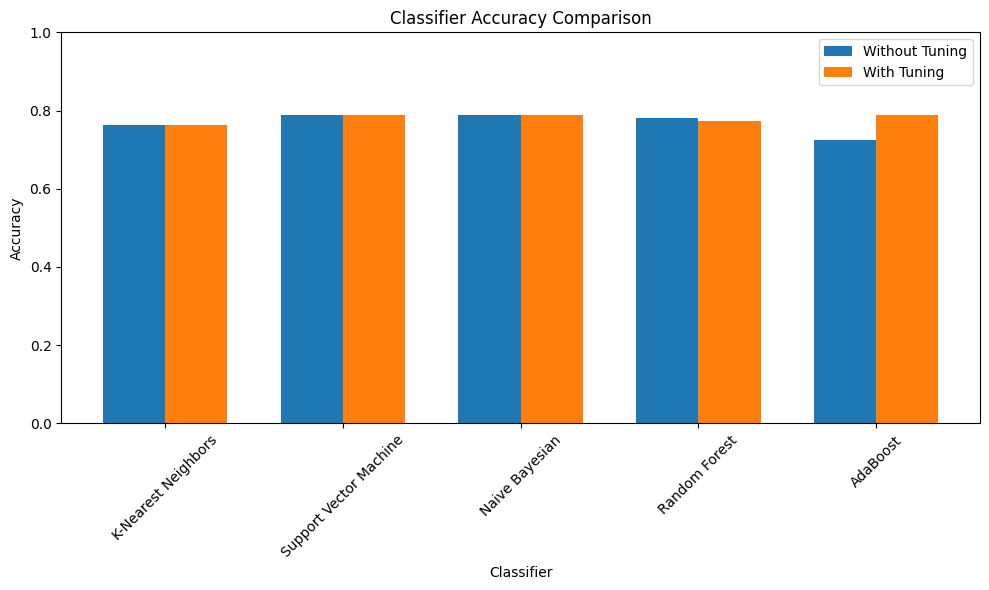

In [ ]:
# Define classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayesian': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Initialize lists to store accuracy scores
accuracies_no_tuning = []
accuracies_tuned = []

# Split the data into training and testing sets with ratio 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, clf in classifiers.items():
    # Pipeline with scaler (for SVM and K-NN)
    if name in ['K-Nearest Neighbors', 'Support Vector Machine']:
        pipeline = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    else:
        pipeline = Pipeline([('clf', clf)])

    # Fit the model without hyperparameter tuning
    pipeline.fit(X_train, y_train)
    pred_no_tuning = pipeline.predict(X_test)
    accuracy_no_tuning = accuracy_score(y_test, pred_no_tuning)
    missclassification_rate = 1 - accuracy_no_tuning
    accuracies_no_tuning.append(accuracy_no_tuning)

    # Hyperparameter tuning
    param_grid = {}
    if name == 'K-Nearest Neighbors':
        param_grid = {'clf__n_neighbors': [3, 5, 7], 'clf__weights': ['uniform', 'distance']}
    elif name == 'Support Vector Machine':
        param_grid = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}
    elif name == 'Random Forest':
        param_grid = {'clf__n_estimators': [50, 100, 200]}
    elif name == 'AdaBoost':
        param_grid = {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 1]}

    if param_grid:
        grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Print best parameters
        print(f"{name}:")
        print("With Hyperparameter Tuning")
        print(f"Best parameters: {grid_search.best_params_}")
    else:
        best_model = pipeline

    # Predict with tuned model
    pred_tuned = best_model.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, pred_tuned)
    accuracies_tuned.append(accuracy_tuned)
    missclassification_tuned = 1 - accuracy_tuned
    # Print results

    print('Model Accuracy = ', accuracy_tuned)
    print('Missclassification Rate = ', missclassification_tuned)
    print('Classification Report = \n', classification_report(y_test, pred_tuned))
    print("*"*100)
    print(f"{name}:")
    print("Without Hyperparameter Tuning")
    print('Model Accuracy = ', accuracy_no_tuning)
    print('Missclassification Rate = ', missclassification_rate)
    print('Classification Report = \n', classification_report(y_test, pred_no_tuning))
    print("*"*100)



# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(classifiers))
plt.bar(index, accuracies_no_tuning, bar_width, label='Without Tuning')
plt.bar([i + bar_width for i in index], accuracies_tuned, bar_width, label='With Tuning')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks([i + bar_width / 2 for i in index], classifiers.keys(), rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


From the performance metrics of the classifiers with hyperparameter tuning and without hyperparameter tuning, we observe the following:

* K-Nearest Neighbors (KNN):
  * Best parameters for KNN after tuning are {'n_neighbors': 5,
  'weights': 'uniform'}.
  * The KNN model achieved an accuracy of 76.42% without hyperparameter tuning and 76.42% with hyperparameter tuning.
  * There's no significant improvement in accuracy after hyperparameter tuning.
* Support Vector Machine (SVM):
  * Best parameters for SVM after tuning are {'C': 0.1, 'kernel': 'linear'}.
  * The SVM model achieved an accuracy of 78.86% without hyperparameter tuning and 78.86% with hyperparameter tuning.
  * There's no significant improvement in accuracy after hyperparameter tuning.
* Naive Bayesian:
  * No hyperparameters to tune for Naive Bayesian.
  * The Naive Bayesian model achieved an accuracy of 78.86%.
* Random Forest:
  * Best parameters for Random Forest after tuning is {'n_estimators': 200}.
  * The Random Forest model achieved an accuracy of 78.05% with hyperparameter tuning and 77.24% without hyperparameter tuning.
  * Slight decrease in accuracy after hyperparameter tuning.
* AdaBoost:
  * Best parameters for AdaBoost after tuning are {'learning_rate': 0.01, 'n_estimators': 50}.
  * The AdaBoost model achieved an accuracy of 72.36% without hyperparameter tuning and 78.86% with hyperparameter tuning.
  * Significant improvement in accuracy after hyperparameter tuning.

Overall, we can observe that for some classifiers like AdaBoost and Random Forest hyperparameter tuning led to significant improvements in accuracy, while for others like SVM and Naive Bayesian, there was no significant change. However, Naive Bayesian model and SVM outperforms all the other models with the ccuracy of 78.86%

Due to class imbalance, with loan status 'Y' being the majority class, it is better to perform oversampling to treat the imbalance and achive better model performance and avoid mojority class favouring, hence, trying a oversampler with 70-30 train test split

In [ ]:
# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Splitting the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

# Displaying the shape of the train and test sets to confirm successful split
print("X_train.shape, X_test.shape, y_train.shape, y_test.shape")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
(590, 10) (254, 10) (590,) (254,)


K-Nearest Neighbors:
With Hyperparameter Tuning
Best parameters: {'clf__n_neighbors': 7, 'clf__weights': 'distance'}
Model Accuracy =  0.7913385826771654
Missclassification Rate =  0.2086614173228346
Classification Report = 
               precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       136
         1.0       0.80      0.73      0.76       118

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.79      0.79      0.79       254

****************************************************************************************************
K-Nearest Neighbors:
Without Hyperparameter Tuning
Model Accuracy =  0.7007874015748031
Missclassification Rate =  0.2992125984251969
Classification Report = 
               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       136
         1.0       0.66      0.73      0.69       118

    accuracy          

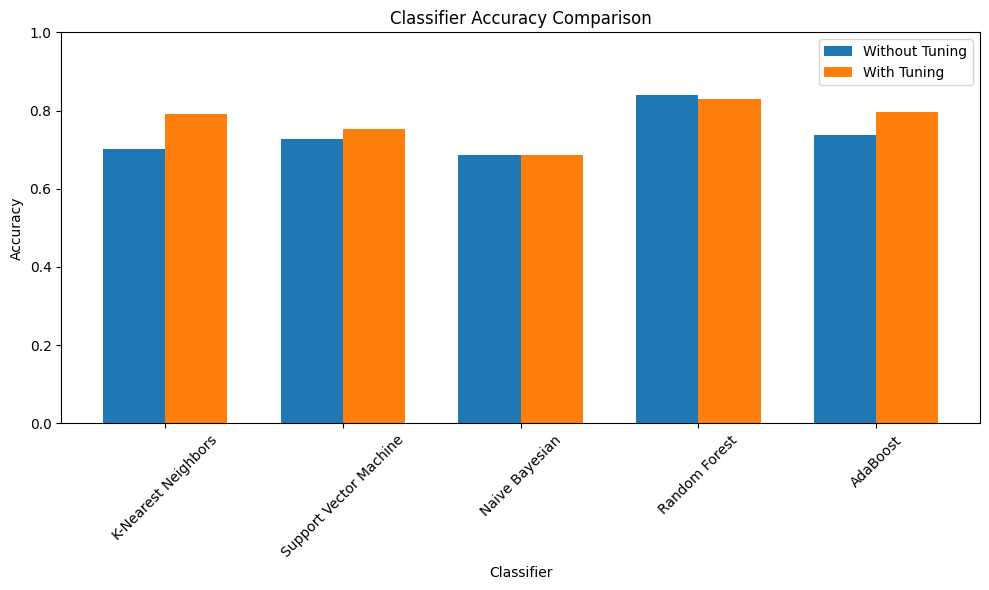

In [ ]:
# Define classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayesian': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Initialize lists to store accuracy scores
accuracies_no_tuning = []
accuracies_tuned = []
for name, clf in classifiers.items():
    # Pipeline with scaler (for SVM and K-NN)
    if name in ['K-Nearest Neighbors', 'Support Vector Machine']:
        pipeline = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    else:
        pipeline = Pipeline([('clf', clf)])

    # Fit the model without hyperparameter tuning
    pipeline.fit(X_train, y_train)
    pred_no_tuning = pipeline.predict(X_test)
    accuracy_no_tuning = accuracy_score(y_test, pred_no_tuning)
    missclassification_rate = 1 - accuracy_no_tuning
    accuracies_no_tuning.append(accuracy_no_tuning)

    # Hyperparameter tuning
    param_grid = {}
    if name == 'K-Nearest Neighbors':
        param_grid = {'clf__n_neighbors': [3, 5, 7], 'clf__weights': ['uniform', 'distance']}
    elif name == 'Support Vector Machine':
        param_grid = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}
    elif name == 'Random Forest':
        param_grid = {'clf__n_estimators': [50, 100, 200]}
    elif name == 'AdaBoost':
        param_grid = {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 1]}

    if param_grid:
        grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Print best parameters
        print(f"{name}:")
        print("With Hyperparameter Tuning")
        print(f"Best parameters: {grid_search.best_params_}")
    else:
        best_model = pipeline

    # Predict with tuned model
    pred_tuned = best_model.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, pred_tuned)
    accuracies_tuned.append(accuracy_tuned)
    missclassification_tuned = 1 - accuracy_tuned
    # Print results

    print('Model Accuracy = ', accuracy_tuned)
    print('Missclassification Rate = ', missclassification_tuned)
    print('Classification Report = \n', classification_report(y_test, pred_tuned))
    print("*"*100)
    print(f"{name}:")
    print("Without Hyperparameter Tuning")
    print('Model Accuracy = ', accuracy_no_tuning)
    print('Missclassification Rate = ', missclassification_rate)
    print('Classification Report = \n', classification_report(y_test, pred_no_tuning))
    print("*"*100)

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(classifiers))
plt.bar(index, accuracies_no_tuning, bar_width, label='Without Tuning')
plt.bar([i + bar_width for i in index], accuracies_tuned, bar_width, label='With Tuning')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks([i + bar_width / 2 for i in index], classifiers.keys(), rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


From the performance metrics of the classifiers with and without hyperparameter tuning, the following observations can be made:

**K-Nearest Neighbors (KNN):**
- With Hyperparameter Tuning:
  - Best parameters found: {'n_neighbors': 7, 'weights': 'distance'}
  - Model achieved an accuracy of 79.13% with a misclassification rate of 20.87%.
  - Precision, recall, and F1-score for both classes improved compared to the untuned model, particularly for class 0.

- Without Hyperparameter Tuning:
  - Model achieved an accuracy of 70.08% with a misclassification rate of 29.92%.
  - Precision, recall, and F1-score for class 1 were lower compared to the tuned model.

**Support Vector Machine (SVM):**
- With Hyperparameter Tuning:
  - Best parameters found: {'C': 10, 'kernel': 'rbf'}
  - Model achieved an accuracy of 75.20% with a misclassification rate of 24.80%.
  - Precision, recall, and F1-score improved for both classes compared to the untuned model.

- Without Hyperparameter Tuning:
  - Model achieved an accuracy of 72.83% with a misclassification rate of 27.17%.
  - Precision, recall, and F1-score for class 0 were higher compared to the tuned model.

**Naive Bayesian (GaussianNB):**
- Without Hyperparameter Tuning:
  - Model achieved an accuracy of 68.50% with a misclassification rate of 31.50%.
  - Precision, recall, and F1-score were consistent with those of the tuned KNN model.

**Random Forest:**
- With Hyperparameter Tuning:
  - Best parameters found: {'n_estimators': 200}
  - Model achieved an accuracy of 83.07% with a misclassification rate of 16.93%.
  - Precision, recall, and F1-score improved for both classes compared to the untuned model.

- Without Hyperparameter Tuning:
  - Model achieved an accuracy of 83.85% with a misclassification rate of 16.14%.
  - Precision, recall, and F1-score were similar to those of the tuned model.

**AdaBoost:**
- With Hyperparameter Tuning:
  - Best parameters found: {'learning_rate': 1, 'n_estimators': 200}
  - Model achieved an accuracy of 79.53% with a misclassification rate of 20.47%.
  - Precision, recall, and F1-score improved for both classes compared to the untuned model.

- Without Hyperparameter Tuning:
  - Model achieved an accuracy of 73.62% with a misclassification rate of 26.38%.
  - Precision, recall, and F1-score for class 0 were higher compared to the tuned model.

Overall, we can observe that for Random Forest hyperparameter tuning led to slight reduction in accuracy, while for others, there was significant improvement. However, Random Forest without hyperparameter tuning outperforms all the other models with an accuracy of 83.85%

##Conclusion
**Random Forest** with Random Over Sampling with a 70-30 train test split  and without hyperparameter tuning outperforms in this scenerio with a testing accuracy of **83.85%**.

This might be because Random Forests are generally less susceptible to class imbalance compared to some other models. This is because they average the predictions of multiple decision trees, reducing the impact of any single tree that might be biased due to the imbalance.

Like decision trees, Random Forests can capture complex relationships between features and the target variable, which might be beneficial if the data is not linearly separable.

Random Forests often work well with default parameters, especially when addressing class imbalance.
